## <font color='blue'> Dice Cofficient Similarity Measure of Brain Atlases </font>
==============================================================

#### This Code is Written by:    Phd Student  <font color=Blue> Dalia A. A. Al-Ubaidi </font> <br> <div class="alert alert-info">University Technology Malaysia, UTM</div> <br> Email: aadalia-1980@graduate.utm.my
***

In [43]:
# https://github.com/neurodata/neuroparc/blob/master/scripts/Dice_Correlation_Tutorial.ipynb
import nibabel as nb
import numpy as np
from argparse import ArgumentParser
import matplotlib
from matplotlib import pyplot as plt
import os
import sys
from math import floor

In [44]:
def dice_roi(input_dir, output_dir, atlas1, atlas2):
    """Calculates the dice coefficient for every ROI combination from atlas1 and atlas2

    Parameters
    ----------
    input_dir : str
        Path to input directory
    output_dir : str
        Path to output directory
    atlas1 : str
        path to first atlas to compare
    atlas2 : str
        path to second atlas to compare
    """

    #Create output name for png file
    yname = atlas1.split('_Atlas')[0]
#     res=atlas1.split('space-MNI152NLin6_res-')[1]
#     res=res.split('.nii')[0]
    xname = atlas2.split('_Atlas')[0]
    
    #Create name for the generate files
    png_name=f"DICE_{yname}_&_{xname}_"

    at1 = nb.load(f'{input_dir}/{atlas1}')
    at2 = nb.load(f'{input_dir}/{atlas2}')

    atlas1 = at1.get_fdata()
    atlas2 = at2.get_fdata()
    
    #Get ROI numerical values for both atlases
    labs1 = np.unique(atlas1)
    labs2 = np.unique(atlas2)
    
    #Create ndarray of zeros to contain Dice Coefficients
    Dice = np.zeros((labs1.size, labs2.size))

    max_y=len(labs1)-1
    max_x=len(labs2)-1

    #Itterate through the ROIs of each atlas and calculate the Dice Coefficient
    for i in range(len(labs1)):
        val1=labs1[i]
        for j in range(len(labs2)):
            val2=labs2[j]
            #Calculate Dice Coefficient
            dice = np.sum(atlas1[atlas2==val2]==val1)*2.0 / (np.sum(atlas1[atlas1==val1]==val1) + np.sum(atlas2[atlas2==val2]==val2))
            
            #Store in ndarray
            Dice[int(i)][int(j)]=float(dice)

            print(f'Dice coefficient for {yname} {i} of {max_y}, {xname} {j} of {max_x} = {dice}')
            
            #Check for false Dice Coefficients and return what ROIs caused the issue
            if dice > 1 or dice < 0:
                raise ValueError(f"Dice coefficient is greater than 1 or less than 0 ({dice}) at atlas1: {val1}, atlas2: {val2}")

    #Save Dice map to csv file, comma delimited
    np.savetxt(f'{output_dir}/{png_name}.csv', Dice, delimiter=",")
    
    

    return Dice, labs1, labs2,yname,xname


In [28]:
from nilearn import image as nimg

def dice_4_OneNetwork(input_dir, output_dir, atlas1, atlas2, Label1, Label2):
    """Calculates the dice coefficient for every ROI combination from atlas1 and atlas2

    Parameters
    ----------
    input_dir : str
        Path to input directory
    output_dir : str
        Path to output directory
    atlas1 : str
        path to first atlas to compare
    atlas2 : str
        path to second atlas to compare
    """

    #Create output name for png file
    yname = atlas1.split('_Atlas')[0]
#     res=atlas1.split('space-MNI152NLin6_res-')[1]
#     res=res.split('.nii')[0]
    xname = atlas2.split('_Atlas')[0]
    
    #Create name for the generate files
    png_name=f"DICE_{yname}_&_{xname}_"

    at1 = nb.load(f'{input_dir}/{atlas1}')
    at2 = nb.load(f'{input_dir}/{atlas2}')
    at2 = nimg.resample_to_img(at2, at1, interpolation = 'nearest')
    
    
    atlas1 = at1.get_fdata()
    atlas2 = at2.get_fdata()
    #------------ to remove 4th dim
    atlas2=atlas2[:,:,:,0]
    # print('atlas1=', atlas1.shape)
    
#     print('atlas1=', atlas1.shape)
#     print('atlas2=', atlas2.shape)
    #Get ROI numerical values for both atlases
    labs1 = np.unique(atlas1)
    labs2 = np.unique(atlas2)
    
    #Create ndarray of zeros to contain Dice Coefficients
    Dice = np.zeros((labs1.size, labs2.size))

    max_y=len(labs1)-1
    max_x=len(labs2)-1

    #Itterate through the ROIs of each atlas and calculate the Dice Coefficient
    for i in range(1,2): #len(labs1)):
        val1=Label1 #labs1[i]
        for j in range(1,2): #len(labs2)):
            val2=Label2 #labs2[j]
            #Calculate Dice Coefficient
            dice = np.sum(atlas1[atlas2==val2]==val1)*2.0 / (np.sum(atlas1[atlas1==val1]==val1) + np.sum(atlas2[atlas2==val2]==val2))
            
            #Store in ndarray
            Dice[int(i)][int(j)]=float(dice)

#             print(f'Dice coefficient for {yname} {i} of {max_y}, {xname} {j} of {max_x} = {dice}')
            
            #Check for false Dice Coefficients and return what ROIs caused the issue
            if dice > 1 or dice < 0:
                raise ValueError(f"Dice coefficient is greater than 1 or less than 0 ({dice}) at atlas1: {val1}, atlas2: {val2}")

    #Save Dice map to csv file, comma delimited
    np.savetxt(f'{output_dir}/{png_name}.csv', Dice, delimiter=",")
    
#     print('Dice', Dice)

    return Dice[1][1], labs1, labs2,yname,xname


In [29]:
# F='Yeo2011_17Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz'
# at1 = nb.load(F)
# atlas1 = at1.get_fdata()
# print('atlas1=', atlas1.shape)
# atlas1=atlas1[:,:,:,0]
# print('atlas1=', atlas1.shape)

In [32]:
# --------------Dice for  HexaNet and AAL (Yeo17)
# https://github.com/neurodata/neuroparc/blob/master/scripts/Dice_Correlation_Tutorial.ipynb
import nibabel as nb
import numpy as np
from argparse import ArgumentParser
import matplotlib
from matplotlib import pyplot as plt
import os
import sys
from math import floor


input_dir=r'C:\Users\IT-Department\LLN Code Python\2nd Code\Work4ThesisInshallah'
output_dir=r'C:\Users\IT-Department\LLN Code Python\2nd Code\Work4ThesisInshallah'
atlases=['HexaNet_ATLAS.nii.gz',
         'Yeo2011_17Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz']
         

N =6 # len(atlases)
M=17
Dice_matrix=np.zeros ((N,M))

# Itterate through every combination of the atlases provided (except duplicates)
for i in range(1,6+1):
    for j in range(1,17+1):
        if j >= i:
            Dice_matrix[i-1][j-1], ylabels, xlabels,yname,xname = dice_4_OneNetwork(input_dir,output_dir,atlases[0],atlases[1],i,j)
#             Dice_matrix, ylabels, xlabels,yname,xname = dice_roi(input_dir,output_dir,atlases[i],atlases[j])
            

print('Done')

Done


In [40]:
np.set_printoptions(precision=5, suppress=True)
print(Dice_matrix)


[[0.      0.      0.00651 0.55594 0.      0.00636 0.17845 0.00485 0.
  0.      0.      0.00098 0.00063 0.25196 0.      0.00322 0.00805]
 [0.      0.00803 0.00013 0.00215 0.03913 0.05663 0.0188  0.21928 0.00077
  0.04207 0.1493  0.38572 0.4289  0.00461 0.00666 0.09457 0.05476]
 [0.      0.      0.08594 0.01579 0.48331 0.42475 0.06387 0.009   0.00857
  0.      0.00921 0.0755  0.00032 0.01017 0.04605 0.01307 0.00116]
 [0.      0.      0.      0.00199 0.02111 0.00002 0.02969 0.02761 0.04751
  0.0373  0.01036 0.      0.04655 0.06404 0.09024 0.34351 0.40572]
 [0.      0.      0.      0.      0.      0.00848 0.1407  0.00345 0.
  0.      0.00017 0.00001 0.      0.04897 0.      0.      0.     ]
 [0.      0.      0.      0.      0.      0.00516 0.37781 0.33372 0.00517
  0.02572 0.      0.00475 0.      0.06096 0.      0.      0.00022]]


Average of  Dice Coff. among Pairs of HexaNet - AAL Atlases = 0.058001170042791345


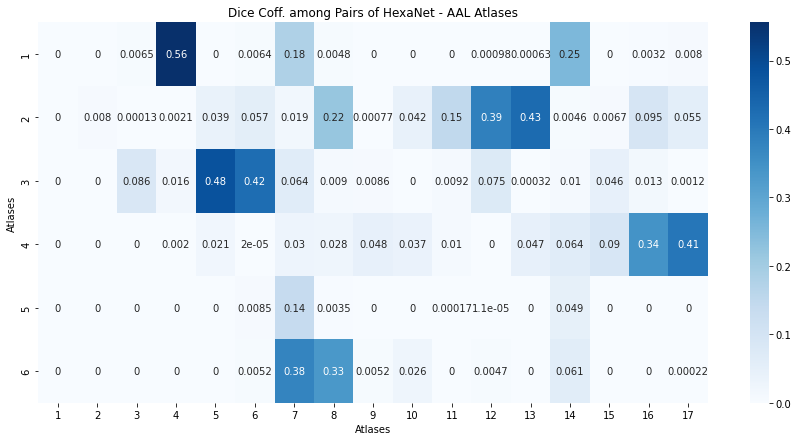

In [37]:
# for i in range(len(atlases)):
# print(Dice_matrix)
# print(Dice_matrix.shape)
# for i in range(len(atlases)):
#     for j in range(len(atlases)):
#         if j > i:
#             Dice_matrix[j][i]=Dice_matrix[i][j]
#         if i==j:
#             Dice_matrix[j][i]=1
# print(Dice_matrix)

xlabels=[1,2,3,4,5,6] #['Yeo7','PP13','Sch100','CC200','CC400']
ylabels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17] #['Yeo7','PP13','Sch100','CC200','CC400']

plot_dice_222(Dice_matrix,xlabels,ylabels,'Dice Coff. among Pairs of HexaNet - AAL Atlases')

In [86]:
def plot_dice(Dice,labs2,labs1,yname,xname):
    
    
    #Create name for the generate files
    png_name=f"DICE_{yname}_&_{xname}_"
    
    print('Average of ',png_name[:-1],'=', np.mean(Dice))
    
    #Generate png of heatmap
    fig, ax = plt.subplots(figsize = (5,5))
    #Create the heatmap:
    #cmap = color-scheme
    #norm = whether to make the colorbar logarithmic
    im = ax.imshow(Dice, cmap="Blues") #, norm=matplotlib.colors.LogNorm()

    #If there are more than 30 ROIs in an atlas, if so, then increase the step size for tick marks
    #on the x and y axes
    if len(labs1)<30:
        step1=1
    else:
        step1=floor(len(labs1)/30)

    if len(labs2)<30:
        step2=1
    else:
        step2=floor(len(labs2)/30)

        
    labs1=labs1.astype(int)
    labs2=labs2.astype(int)
    
    #Create tickmarks for axes
    ax.set_xticks(np.arange(0,len(labs2), step=step2))
    ax.set_yticks(np.arange(0,len(labs1), step=step1))

    #Add the label values to the corresponding tickmarks
    ax.set_xticklabels(labs2[0::step2])
    ax.set_yticklabels(labs1[0::step1])
    
    #Label x and y axes
    ax.set_ylabel(f'NOIs for {yname} atlas')
    ax.set_xlabel(f'NOIs for {xname} atlas')
    
    #Set the fontsize of the tickmark labels, rotate the x-axis labels 90 degrees to prevent overlap
    plt.setp(ax.get_xticklabels(), fontsize=9, rotation=90, ha="right", rotation_mode="anchor")
    plt.setp(ax.get_yticklabels(), fontsize=9)

    #Set title for the heatmap
    ax.set_title(f'{yname} vs {xname}')
    
    # Try to counteract the lopsided amount of ROIs between atlases
    # By changing the aspect ratio between the x and y axes of the graph
    aspect_ratio=len(labs2)/len(labs1)
    ax.set_aspect(aspect=aspect_ratio)

    plt.colorbar(im, aspect=30)
    fig.tight_layout()

    plt.show()
    #Save Dice map as a png file
    plt.savefig(f'{output_dir}/{png_name}.png', dpi=1000)


In [36]:
import seaborn as sn
import matplotlib.pyplot as plt

def plot_dice_222(Dice,labs2,labs1,Title):
    
    
    #Create name for the generate files
#     png_name=f"DICE_{yname}_&_{xname}_"
    
    print('Average of ',Title,'=', np.mean(Dice))
    
    #Generate png of heatmap
#     fig, ax = plt.subplots(figsize = (6,6))
   
#     im = ax.imshow(Dice, cmap="Blues") #, norm=matplotlib.colors.LogNorm()

    #If there are more than 30 ROIs in an atlas, if so, then increase the step size for tick marks
    #on the x and y axes
    if len(labs1)<30:
        step1=1
    else:
        step1=floor(len(labs1)/30)

    if len(labs2)<30:
        step2=1
    else:
        step2=floor(len(labs2)/30)

        
#     labs1=labs1.astype(int)
#     labs2=labs2.astype(int)
    
    #Create tickmarks for axes
#     ax.set_xticks(np.arange(0,len(labs2), step=step2))
#     ax.set_yticks(np.arange(0,len(labs1), step=step1))

#     #Add the label values to the corresponding tickmarks
#     ax.set_xticklabels(labs2[0::step2])
#     ax.set_yticklabels(labs1[0::step1])
    
#     #Label x and y axes
#     ax.set_ylabel('Atlases') #f'NOIs for {yname} atlas')
#     ax.set_xlabel('Atlases') #f'NOIs for {xname} atlas')
    
    fig= plt.figure(figsize = (15,7))
    
    y_axis_labels=labs2
    x_axis_labels=labs1

    sn.heatmap(Dice, annot=True,cmap='Blues', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    plt.xlabel('Atlases')
    plt.ylabel('Atlases')
    plt.title(Title)

   
    fig.savefig(Title+'.tif')
    
    #Set the fontsize of the tickmark labels, rotate the x-axis labels 90 degrees to prevent overlap
#     plt.setp(ax.get_xticklabels(), fontsize=9, rotation=90, ha="right", rotation_mode="anchor")
#     plt.setp(ax.get_yticklabels(), fontsize=9)

    #Set title for the heatmap
#     ax.set_title(Title)#f'{yname} vs {xname}')
    
    # Try to counteract the lopsided amount of ROIs between atlases
    # By changing the aspect ratio between the x and y axes of the graph
#     aspect_ratio=len(labs2)/len(labs1)
#     ax.set_aspect(aspect=aspect_ratio)

#     plt.colorbar(im, aspect=30)
#     fig.tight_layout()

    plt.show()
    #Save Dice map as a png file
#     plt.savefig(f'{output_dir}/{png_name}.png', dpi=1000)


In [132]:
import os

def convert_path(path):
    # Convert Windows-style path separators to Unix-style
    path = path.replace("\\", "/")
    
    # Convert Windows drive letter to Unix-style root
    if ":" in path:
        drive, path = path.split(":", 1)
        path = "/" + drive.upper() + path
    
    return path
# =============================================================
# Example usage
# windows_path = r"C:\Users\John\Documents\file.txt"
# linux_path = convert_path(windows_path)
# print(linux_path)



input_dir=r'C:\Users\IT-Department\LLN Code Python\2nd Code\Work4ThesisInshallah\T_RSNs'
output_dir=r'C:\Users\IT-Department\LLN Code Python\2nd Code\Work4ThesisInshallah\T_RSNs'
atlases=['K_resampled_Yeo7-6RSNs_atlas.nii.gz',
         'K_resampled_Power-6RSNs_atlas.nii.gz',
         'K_resampled_Shafer-6RSNs_atlas.nii.gz',
         'K_resampled_CradCC200-6RSNs_atlas.nii.gz',
         'K_resampled_CradCC400-6RSNs_atlas.nii.gz']

N = len(atlases)

Dice_matrix=np.zeros ((N,N))

# Itterate through every combination of the atlases provided (except duplicates)
for i in range(len(atlases)):
    for j in range(len(atlases)):
        if j > i:
            Dice_matrix[i][j], ylabels, xlabels,yname,xname = dice_4_OneNetwork(input_dir,output_dir,atlases[i],atlases[j],6)
#             Dice_matrix, ylabels, xlabels,yname,xname = dice_roi(input_dir,output_dir,atlases[i],atlases[j])
            

print('Done')

atlas1= (182, 218, 182, 1)
atlas2= (182, 218, 182)
Dice coefficient for K_resampled_Yeo7-6RSNs_atlas.nii.gz 1 of 5, K_resampled_Power-6RSNs_atlas.nii.gz 1 of 6 = 0.1655257695535044
Dice [[0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.16552577 0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]]
atlas1= (182, 218, 182, 1)
atlas2= (182, 218, 182)
Dice coefficient for K_resampled_Yeo7-6RSNs_atlas.nii.gz 1 of 5, K_resampled_Shafer-6RSNs_atlas.nii.gz 1 of 5 = 0.6776662326206578
Dice [[0.         0.         0.         0.         0.         0.        ]
 [0.         0.67766623 0.         0.         0.         0.        ]
 [0.         0.         0.         0.       

In [133]:
# for i in range(len(atlases)):
print(Dice_matrix)

for i in range(len(atlases)):
    for j in range(len(atlases)):
        if j > i:
            Dice_matrix[j][i]=Dice_matrix[i][j]
        if i==j:
            Dice_matrix[j][i]=1
print(Dice_matrix)

[[0.         0.16552577 0.67766623 0.0795857  0.27798357]
 [0.         0.         0.15270232 0.08487192 0.14750893]
 [0.         0.         0.         0.06872391 0.20940256]
 [0.         0.         0.         0.         0.75787656]
 [0.         0.         0.         0.         0.        ]]
[[1.         0.16552577 0.67766623 0.0795857  0.27798357]
 [0.16552577 1.         0.15270232 0.08487192 0.14750893]
 [0.67766623 0.15270232 1.         0.06872391 0.20940256]
 [0.0795857  0.08487192 0.06872391 1.         0.75787656]
 [0.27798357 0.14750893 0.20940256 0.75787656 1.        ]]


Average of  Dice Coff. among Pairs of 5 Atlases - VAN = 0.40974779862993616


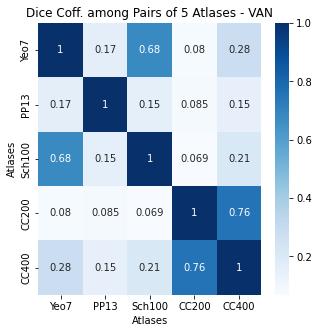

In [134]:
xlabels=['Yeo7','PP13','Sch100','CC200','CC400']
ylabels=['Yeo7','PP13','Sch100','CC200','CC400']

plot_dice_222(Dice_matrix,xlabels,ylabels,'Dice Coff. among Pairs of 5 Atlases - VAN')

In [48]:
atlas1='Power_Atlas-MNI152NLin6_res-1x1x1.nii.gz'
yname = atlas1.split('_Atlas')[0]
# res=atlas1.split('space-"MNI152NLin6_res-')[1]
# res=res.split('.nii')[0]
print(yname)

Power
